In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('db')
cur = conn.cursor()

In [ ]:
df = pd.DataFrame({'col':[1,2,6]})

In [ ]:
df

,col
0,1
1,2
2,6


In [ ]:
df.to_sql('test_table',conn,index=False,if_exists='replace')

In [ ]:
sql = '''
select 
t.col*5,
t.col*t.col 
from test_table t
'''

In [ ]:
pd.read_sql(sql,conn)

,t.col*5,t.col*t.col
0,5,1
1,10,4
2,30,36


In [ ]:
! ls 'drive/My Drive/data/telecom_practicum'

calls.csv     messages.csv  telecom_joined.csv
internet.csv  tariffs.csv   users.csv


In [ ]:
df = pd.read_csv('drive/My Drive/data/telecom_practicum/users.csv')

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.dtypes

user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object

In [ ]:
df['reg_date'].sample(5)

475    2018-01-09
235    2018-10-06
236    2018-12-22
371    2018-12-25
259    2018-11-04
Name: reg_date, dtype: object

In [ ]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')

In [ ]:
df['churn_date'] = pd.to_datetime(df['churn_date'],format='%Y-%m-%d')

In [ ]:
df.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [ ]:
df.to_sql('users',conn,index=False,if_exists='replace')

In [ ]:
sql = '''select * from users t limit 10'''

In [ ]:
def select(sql):
  return pd.read_sql(sql,conn)

In [ ]:
sql = '''select t.user_id from users t limit 10'''

In [ ]:
select(sql)

,user_id
0,1000
1,1001
2,1002
3,1003
4,1004
5,1005
6,1006
7,1007
8,1008
9,1009


In [ ]:
! ls 'drive/My Drive/data/telecom_practicum'

calls.csv     messages.csv  telecom_joined.csv
internet.csv  tariffs.csv   users.csv


In [ ]:
df = pd.read_csv('drive/My Drive/data/telecom_practicum/calls.csv')

In [ ]:
df.head()

,Unnamed: 0,id,call_date,duration,user_id
0,0,1000_0,2018-07-25,0.00,1000
1,1,1000_1,2018-08-17,0.00,1000
2,2,1000_2,2018-06-11,2.85,1000
3,3,1000_3,2018-09-21,13.80,1000
4,4,1000_4,2018-12-15,5.18,1000


In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df['call_date'] = pd.to_datetime(df['call_date'],format='%Y-%m-%d')

In [ ]:
len(df)

202607

In [ ]:
df

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [ ]:
df.sample(1000).to_sql('calls',conn,index=False,if_exists='replace')

In [ ]:
sql = '''select * from calls t limit 10'''

In [ ]:
select(sql)

,id,call_date,duration,user_id
0,1121_364,2018-07-08 00:00:00,16.06,1121
1,1450_123,2018-10-23 00:00:00,9.68,1450
2,1008_27,2018-12-26 00:00:00,0.00,1008
3,1227_96,2018-05-21 00:00:00,12.58,1227
4,1432_302,2018-08-30 00:00:00,12.75,1432
5,1375_325,2018-03-20 00:00:00,6.01,1375
6,1222_259,2018-10-17 00:00:00,0.00,1222
7,1189_135,2018-11-06 00:00:00,11.59,1189
8,1346_609,2018-11-10 00:00:00,4.91,1346
9,1495_63,2018-11-19 00:00:00,18.18,1495


In [ ]:
df.to_sql('calls',conn,index=False,if_exists='replace')

In [ ]:
len(df)

202607

In [ ]:
sql = '''select count(*) from calls t limit 10'''

In [ ]:
select(sql)

,count(*)
0,202607


In [ ]:
sql = '''select * from calls t limit 10'''

In [ ]:
select(sql)

,id,call_date,duration,user_id
0,1000_0,2018-07-25 00:00:00,0.00,1000
1,1000_1,2018-08-17 00:00:00,0.00,1000
2,1000_2,2018-06-11 00:00:00,2.85,1000
3,1000_3,2018-09-21 00:00:00,13.80,1000
4,1000_4,2018-12-15 00:00:00,5.18,1000
5,1000_5,2018-11-02 00:00:00,0.00,1000
6,1000_6,2018-10-18 00:00:00,0.00,1000
7,1000_7,2018-08-22 00:00:00,18.31,1000
8,1000_8,2018-09-15 00:00:00,18.44,1000
9,1000_9,2018-08-15 00:00:00,0.00,1000


In [ ]:
sql = '''select count(distinct t.user_id) from calls t limit 10'''

In [ ]:
select(sql)

,count(distinct t.user_id)
0,492


In [ ]:
sql = '''select count(distinct t.user_id) from users t'''

In [ ]:
select(sql)

,count(distinct t.user_id)
0,500


In [ ]:
sql = '''SELECT date('now','start of month'); '''

In [ ]:
select(sql)

,"date('now','start of month')"
0,2020-11-01


In [ ]:
sql = '''select 

t.*, 
date(t.call_date,'start of month') as month

from calls t limit 10'''

In [ ]:
select(sql)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25 00:00:00,0.00,1000,2018-07-01
1,1000_1,2018-08-17 00:00:00,0.00,1000,2018-08-01
2,1000_2,2018-06-11 00:00:00,2.85,1000,2018-06-01
3,1000_3,2018-09-21 00:00:00,13.80,1000,2018-09-01
4,1000_4,2018-12-15 00:00:00,5.18,1000,2018-12-01
5,1000_5,2018-11-02 00:00:00,0.00,1000,2018-11-01
6,1000_6,2018-10-18 00:00:00,0.00,1000,2018-10-01
7,1000_7,2018-08-22 00:00:00,18.31,1000,2018-08-01
8,1000_8,2018-09-15 00:00:00,18.44,1000,2018-09-01
9,1000_9,2018-08-15 00:00:00,0.00,1000,2018-08-01


In [ ]:
sql = '''
select 

date(t.call_date,'start of month') as month,
sum(t.duration) as sum_dur

from calls t
group by date(t.call_date,'start of month')
'''

In [ ]:
df = select(sql)

In [ ]:
df

,month,sum_dur
0,2018-01-01,10206.44
1,2018-02-01,23145.58
2,2018-03-01,45433.85
3,2018-04-01,62530.92
4,2018-05-01,83770.77
5,2018-06-01,99249.71
6,2018-07-01,124373.23
7,2018-08-01,145071.63
8,2018-09-01,163723.16
9,2018-10-01,183068.38


In [ ]:
df['sum_dur'].sum()

1368790.0400000045

In [ ]:
sql = '''select sum(t.duration) from calls t '''

In [ ]:
select(sql)

,sum(t.duration)
0,1368790.04


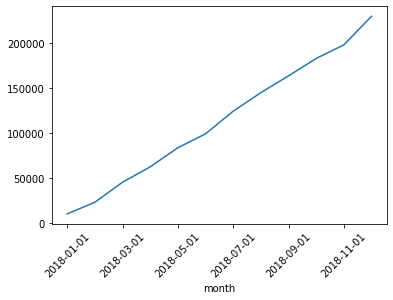

In [ ]:
df.set_index('month')['sum_dur'].plot(rot=45)

In [ ]:
df

,month,sum_dur
0,2018-01-01,10206.44
1,2018-02-01,23145.58
2,2018-03-01,45433.85
3,2018-04-01,62530.92
4,2018-05-01,83770.77
5,2018-06-01,99249.71
6,2018-07-01,124373.23
7,2018-08-01,145071.63
8,2018-09-01,163723.16
9,2018-10-01,183068.38


In [ ]:
sql = '''select t.user_id, date(t.reg_date,'start of month') as month from users t'''

In [ ]:
select(sql)

,user_id,month
0,1000,2018-05-01
1,1001,2018-11-01
2,1002,2018-06-01
3,1003,2018-08-01
4,1004,2018-05-01
...,...,...
495,1495,2018-08-01
496,1496,2018-01-01
497,1497,2018-10-01
498,1498,2018-07-01


In [ ]:
sql = '''select min(date(t.call_date,'start of month')) from calls t'''

In [ ]:
select(sql)

,"min(date(t.call_date,'start of month'))"
0,2018-01-01


In [ ]:
sql = '''WITH RECURSIVE dates(date) AS (
  VALUES('2018-01-01')
  UNION ALL
  SELECT date(date, '+1 day')
  FROM dates
  WHERE date < '2018-12-31'
)
SELECT distinct date(date,'start of month') as month FROM dates;'''

In [ ]:
select(sql)

,month
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [ ]:
sql = '''select 
t.user_id,
date(t.reg_date,'start of month') as reg_month,
d.month

from users t
join (WITH RECURSIVE dates(date) AS (
  VALUES('2018-01-01')
  UNION ALL
  SELECT date(date, '+1 day')
  FROM dates
  WHERE date < '2018-12-31'
)
SELECT distinct date(date,'start of month') as month FROM dates) d

'''

In [ ]:
select(sql)

,user_id,reg_month,month
0,1000,2018-05-01,2018-01-01
1,1000,2018-05-01,2018-02-01
2,1000,2018-05-01,2018-03-01
3,1000,2018-05-01,2018-04-01
4,1000,2018-05-01,2018-05-01
...,...,...,...
5995,1499,2018-09-01,2018-08-01
5996,1499,2018-09-01,2018-09-01
5997,1499,2018-09-01,2018-10-01
5998,1499,2018-09-01,2018-11-01


In [ ]:
sql = '''
drop table if exists date_range;

create table date_range as

WITH RECURSIVE dates(date) AS (
  VALUES('2018-01-01')
  UNION ALL
  SELECT date(date, '+1 day')
  FROM dates
  WHERE date < '2018-12-31'
)
SELECT distinct date(date,'start of month') as month FROM dates;'''

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''select * from date_range t'''

In [ ]:
select(sql)

,month
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [ ]:
sql = '''
drop table if exists report_1;

create table report_1 as
select 
t.user_id,
date(t.reg_date,'start of month') as reg_month,
d.month

from users t
join date_range d on d.month >= date(t.reg_date,'start of month')

--where t.user_id = 1200
'''

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''select * from report_1 t'''

In [ ]:
select(sql)

,user_id,reg_month,month
0,1000,2018-05-01,2018-05-01
1,1000,2018-05-01,2018-06-01
2,1000,2018-05-01,2018-07-01
3,1000,2018-05-01,2018-08-01
4,1000,2018-05-01,2018-09-01
...,...,...,...
3254,1498,2018-07-01,2018-12-01
3255,1499,2018-09-01,2018-09-01
3256,1499,2018-09-01,2018-10-01
3257,1499,2018-09-01,2018-11-01


In [ ]:
sql = '''select * from calls t'''

In [ ]:
select(sql)

,id,call_date,duration,user_id
0,1000_0,2018-07-25 00:00:00,0.00,1000
1,1000_1,2018-08-17 00:00:00,0.00,1000
2,1000_2,2018-06-11 00:00:00,2.85,1000
3,1000_3,2018-09-21 00:00:00,13.80,1000
4,1000_4,2018-12-15 00:00:00,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26 00:00:00,0.76,1499
202603,1499_216,2018-10-18 00:00:00,18.83,1499
202604,1499_217,2018-11-10 00:00:00,10.81,1499
202605,1499_218,2018-10-06 00:00:00,4.27,1499


In [ ]:
sql = '''
drop table if exists call_month;

create table call_month as

select 

date(t.call_date,'start of month') as month,
t.user_id,
sum(t.duration) as sum_dur

from calls t
group by date(t.call_date,'start of month'), t.user_id
'''

In [ ]:
cur.executescript(sql)

In [ ]:
sql = '''select * from call_month t
left join '''

In [ ]:
select(sql)

,month,user_id,sum_dur
0,2018-01-01,1005,90.93
1,2018-01-01,1032,359.16
2,2018-01-01,1045,8.33
3,2018-01-01,1055,527.95
4,2018-01-01,1071,183.96
...,...,...,...
3169,2018-12-01,1494,388.29
3170,2018-12-01,1495,970.94
3171,2018-12-01,1496,483.91
3172,2018-12-01,1497,515.33


In [ ]:
sql = '''
select * from report_1 t
left join call_month c on t.user_id = c.user_id and t.month = c.month
where t.user_id = 1200
'''

In [ ]:
df = select(sql)

In [ ]:
df

,user_id,reg_month,month,month,user_id,sum_dur
0,1200,2018-04-01,2018-04-01,2018-04-01,1200,47.62
1,1200,2018-04-01,2018-05-01,2018-05-01,1200,429.20
2,1200,2018-04-01,2018-06-01,2018-06-01,1200,534.07
3,1200,2018-04-01,2018-07-01,2018-07-01,1200,546.58
4,1200,2018-04-01,2018-08-01,2018-08-01,1200,593.41
5,1200,2018-04-01,2018-09-01,2018-09-01,1200,525.20
6,1200,2018-04-01,2018-10-01,2018-10-01,1200,722.19
7,1200,2018-04-01,2018-11-01,2018-11-01,1200,665.98
8,1200,2018-04-01,2018-12-01,2018-12-01,1200,549.45
